In [1]:
plt.style.use('bmh')
# plt.style.use('ggplot')
# plt.style.use('seaborn')
# plt.style.use('default')
# plt.style.use('fivethirtyeight')

### Read datasets

In [2]:
# 1) clean dataset
df = pd.read_csv('data/data_clean.csv')
print(df.shape)
df[:3]

(185039, 28)


,Property_UPRN,Postcode,POST_TOWN,Primary Energy Indicator (kWh/m²/year),Total floor area (m²),Current energy efficiency rating,Potential Energy Efficiency Rating,Current Environmental Impact Rating,Potential Environmental Impact Rating,CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr),HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,LIGHTING_DESCRIPTION,Current Emissions (T.CO2/yr),Potential Reduction in Emissions (T.CO2/yr),Total current energy costs over 3 years (£),Current heating costs over 3 years (£),Potential heating costs over 3 years (£),Current hot water costs over 3 years (£),Potential hot water costs over 3 years (£),Current lighting costs over 3 years (£),Potential lighting costs over 3 years (£),Part 1 Construction Age Band,Built Form,Property Type,dt_day,dt_month,Country
0,1001100841,EH4 5EZ,EDINBURGH,375.00,94.00,53.00,85.00,45.00,82.00,66.00,2,2,100,6.20,4.20,"3,789.00","2,922.00","1,548.00",645.00,219.00,222.00,222.00,"1,949.00",Semi-Detached,House,2021-01-01,1,EDINBURGH
1,1001950838,EH7 4HE,EDINBURGH,250.00,175.00,66.00,80.00,57.00,75.00,44.00,4,4,100,7.70,2.80,"4,635.00","4,068.00","3,015.00",246.00,246.00,321.00,321.00,"1,929.00",End-Terrace,House,2021-01-01,1,EDINBURGH
2,1000995515,EH4 2DL,EDINBURGH,403.00,72.00,61.00,78.00,48.00,64.00,68.00,1,2,50,4.90,1.60,"3,570.00","2,226.00","1,191.00","1,038.00",564.00,306.00,207.00,"1,975.00",Semi-Detached,Flat,2021-02-01,2,EDINBURGH


In [3]:
# 2) geodata
import geopandas as gpd
file1 = 'data/metadata/geo/pub_las.shp'
df_shape = gpd.read_file(file1)
repl_geo = {
    'Aberdeen City': 'Aberdeen',
    'City of Edinburgh': 'Edinburgh',
    'Dundee City': 'Dundee',
    'Glasgow City': 'Glasgow',
    'Orkney Islands': 'Orkney',
    'Shetland Islands': 'Shetland Isles',
    'Stirling': 'Stirlingshire',
    'Eilean Siar': 'Western Isles',   
}
del df_shape['code']
del df_shape['hectares']
df_shape['Country'] = df_shape.local_auth.map(lambda x: repl_geo[x] if x in repl_geo else x).str.upper()
del df_shape['local_auth']

### Number or dwellings by countries (rank number on the map)

In [4]:
df1 = df.groupby('Country')['Property_UPRN'].count()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

In [5]:
df1['rank'] = df1.Property_UPRN.rank()

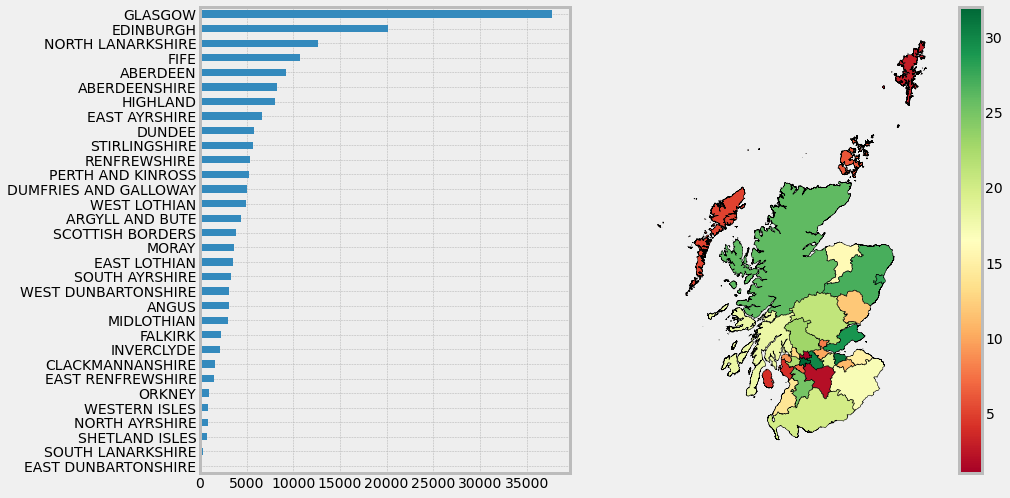

In [6]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')['Property_UPRN'].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = 'rank', k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [7]:
df.groupby(['Country','POST_TOWN'])['Property_UPRN'].count().sort_values(ascending = False)[:10]

Country            POST_TOWN  
GLASGOW            GLASGOW        37529
EDINBURGH          EDINBURGH      19275
ABERDEEN           ABERDEEN        9226
DUNDEE             DUNDEE          5782
RENFREWSHIRE       PAISLEY         3136
FIFE               DUNFERMLINE     3011
PERTH AND KINROSS  PERTH           2964
HIGHLAND           INVERNESS       2877
STIRLINGSHIRE      STIRLING        2548
                   FALKIRK         2387
Name: Property_UPRN, dtype: int64

### Rank Towns by current efficiency rating

In [8]:
feat = 'Current energy efficiency rating'
df1 = df.groupby('Country')[feat].mean()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

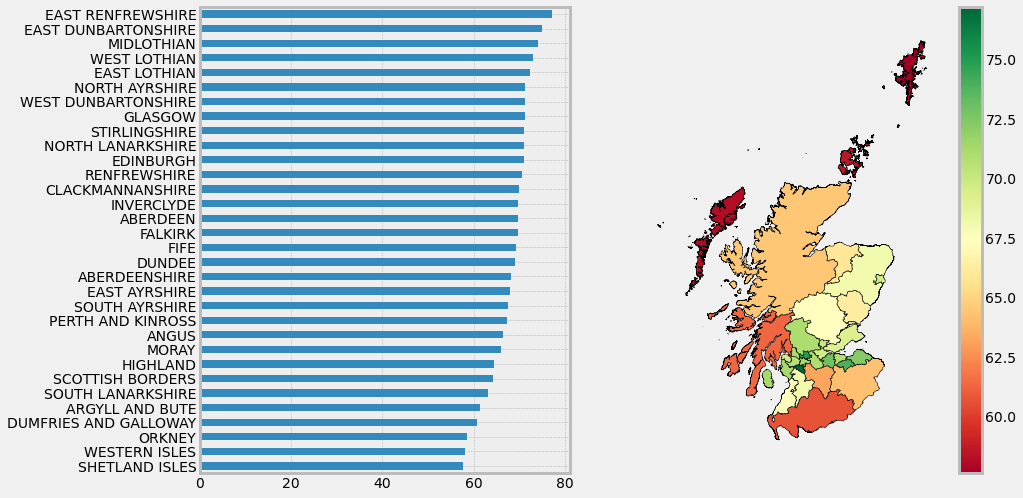

In [9]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')[feat].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = feat, k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [10]:
df2 = df.groupby(['Country','POST_TOWN'])[feat].agg([len, np.mean]).reset_index()
df2 = df2[df2['len'] >= 10].sort_values('mean', ascending = False).reset_index()
del df2['index']
df2[:10]

,Country,POST_TOWN,len,mean
0,NORTH LANARKSHIRE,NORTH LANARKSHIRE,17,97.12
1,EAST LOTHIAN,WALLYFORD,23,89.83
2,NORTH LANARKSHIRE,GLENMAVIS,23,89.52
3,FIFE,METHIL,16,89.44
4,WEST LOTHIAN,WINCHBURGH,31,89.42
5,ABERDEENSHIRE,MINTLAW,25,89.04
6,SCOTTISH BORDERS,ROXBURGHSHIRE,40,89.00
7,EAST LOTHIAN,ORMISTON,70,88.93
8,EAST RENFREWSHIRE,EAST RENFREWSHIRE,295,88.53
9,WEST LOTHIAN,POLBETH,21,88.19


### Rank Towns by potential energy efficiency rating

In [11]:
feat = 'Potential Energy Efficiency Rating'
df1 = df.groupby('Country')[feat].mean()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

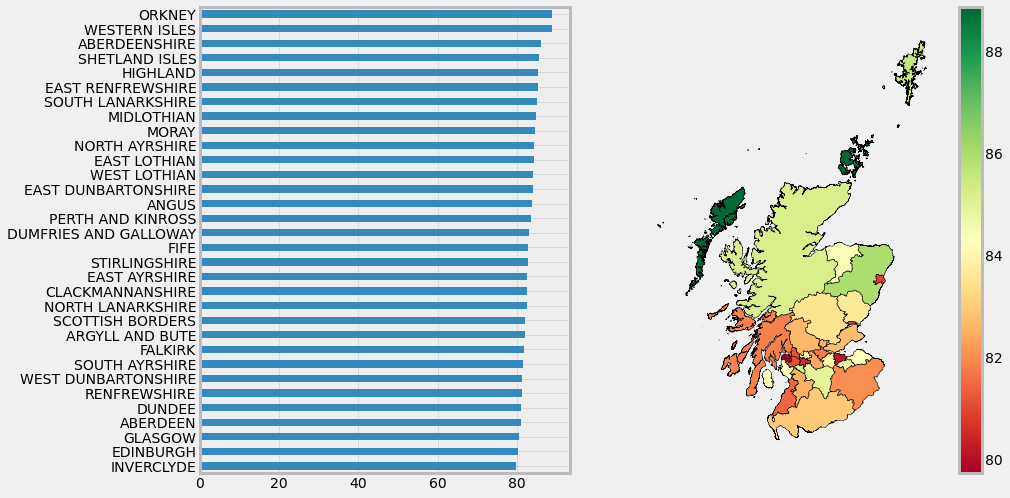

In [12]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')[feat].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = feat, k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [13]:
df2 = df.groupby(['Country','POST_TOWN'])[feat].agg([len, np.mean]).reset_index()
df2 = df2[df2['len'] >= 10].sort_values('mean', ascending = False).reset_index()
del df2['index']
df2[:10]

,Country,POST_TOWN,len,mean
0,HIGHLAND,ROGART,22,102.23
1,ARGYLL AND BUTE,ISLE OF TIREE,17,99.76
2,STIRLINGSHIRE,CRIANLARICH,22,98.32
3,NORTH LANARKSHIRE,NORTH LANARKSHIRE,17,98.06
4,WESTERN ISLES,ISLE OF NORTH UIST,49,96.53
5,WESTERN ISLES,ISLE OF BARRA,23,96.43
6,EAST AYRSHIRE,MACHLINE,21,95.24
7,EAST AYRSHIRE,LUGAR,10,94.50
8,HIGHLAND,ARDERSIER,14,93.86
9,HIGHLAND,GARVE,28,93.68


### Rank Towns by current environmental impact rating

In [14]:
feat = 'Current Environmental Impact Rating'
df1 = df.groupby('Country')[feat].mean()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

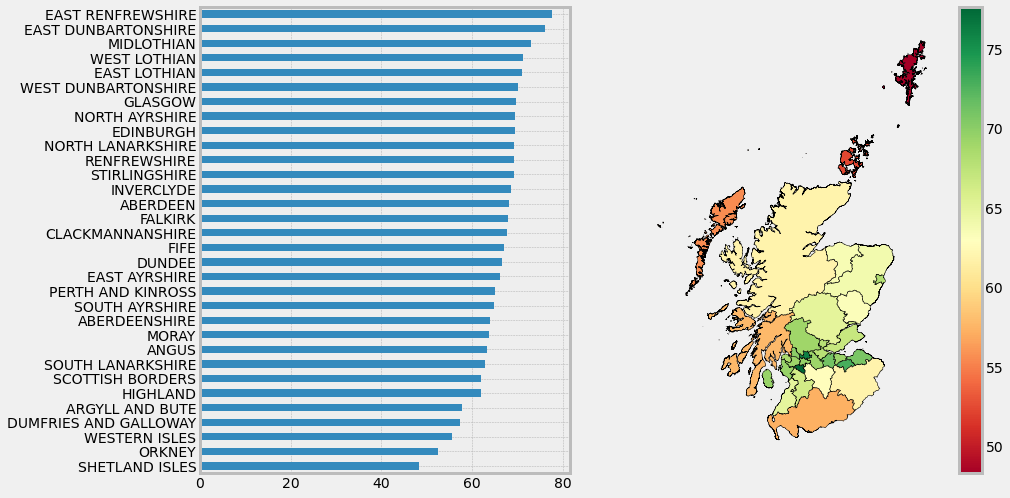

In [15]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')[feat].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = feat, k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [16]:
df2 = df.groupby(['Country','POST_TOWN'])[feat].agg([len, np.mean]).reset_index()
df2 = df2[df2['len'] >= 10].sort_values('mean', ascending = False).reset_index()
del df2['index']
df2[:10]

,Country,POST_TOWN,len,mean
0,NORTH LANARKSHIRE,NORTH LANARKSHIRE,17,98.71
1,EAST LOTHIAN,WALLYFORD,23,91.22
2,FIFE,METHIL,16,91.06
3,SCOTTISH BORDERS,ROXBURGHSHIRE,40,90.95
4,EAST RENFREWSHIRE,GREENOCK,144,90.76
5,NORTH LANARKSHIRE,GLENMAVIS,23,90.09
6,EAST RENFREWSHIRE,EAST RENFREWSHIRE,295,89.81
7,DUMFRIES AND GALLOWAY,DUMFRIES AND GALLOWAY,35,89.71
8,WEST LOTHIAN,POLBETH,21,89.71
9,EAST LOTHIAN,EAST LOTHIAN,100,89.66


### Rank Towns by potential environmental impact rating

In [17]:
feat = 'Potential Environmental Impact Rating'
df1 = df.groupby('Country')[feat].mean()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

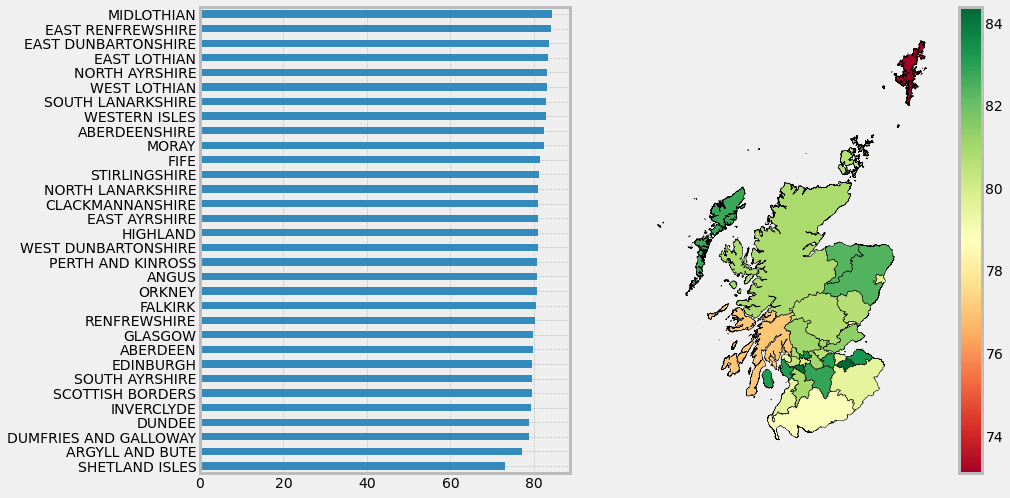

In [18]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')[feat].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = feat, k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [19]:
df2 = df.groupby(['Country','POST_TOWN'])[feat].agg([len, np.mean]).reset_index()
df2 = df2[df2['len'] >= 10].sort_values('mean', ascending = False).reset_index()
del df2['index']
df2[:10]

,Country,POST_TOWN,len,mean
0,NORTH LANARKSHIRE,NORTH LANARKSHIRE,17,99.94
1,EAST AYRSHIRE,MACHLINE,21,96.81
2,EAST AYRSHIRE,LUGAR,10,95.10
3,HIGHLAND,ARDERSIER,14,94.36
4,NORTH LANARKSHIRE,UDDINGSTON,101,94.04
5,WEST LOTHIAN,ARMADALE,29,94.00
6,EAST LOTHIAN,WALLYFORD,23,93.61
7,SCOTTISH BORDERS,ROXBURGHSHIRE,40,92.97
8,DUMFRIES AND GALLOWAY,DUMFRIES AND GALLOWAY,35,92.89
9,FIFE,METHIL,16,92.88


### Rank Towns by Current Emissions (T.CO2/yr)

In [20]:
feat = 'Current Emissions (T.CO2/yr)'
df1 = df.groupby('Country')[feat].mean()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

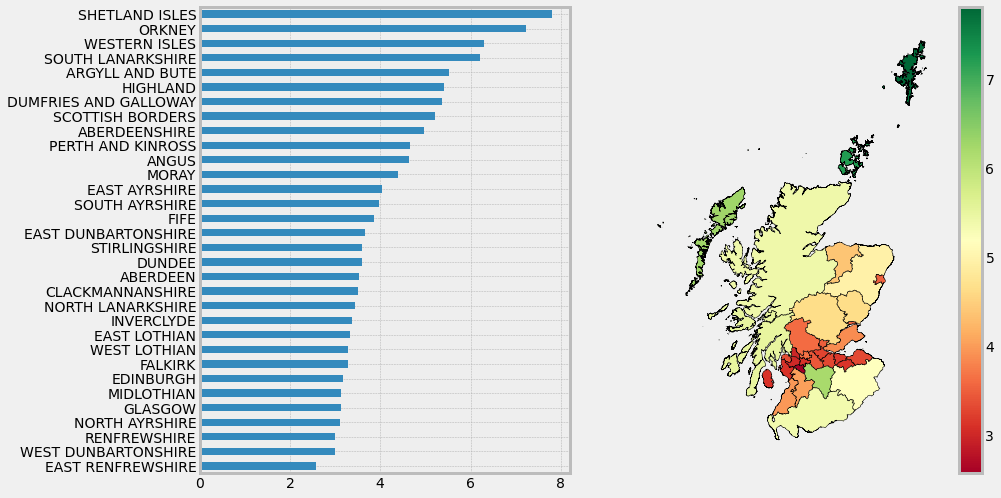

In [21]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')[feat].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = feat, k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [22]:
df2 = df.groupby(['Country','POST_TOWN'])[feat].agg([len, np.mean]).reset_index()
df2 = df2[df2['len'] >= 10].sort_values('mean', ascending = False).reset_index()
del df2['index']
df2[:10]

,Country,POST_TOWN,len,mean
0,HIGHLAND,CARRBRIDGE,23,12.26
1,STIRLINGSHIRE,CRIANLARICH,22,10.80
2,HIGHLAND,HELMSDALE,27,10.50
3,HIGHLAND,KINGUSSIE,71,9.69
4,ARGYLL AND BUTE,TARBERT,130,9.69
5,HIGHLAND,STRATHCARRON,54,9.64
6,SCOTTISH BORDERS,HERIOT,12,9.62
7,HIGHLAND,ROY BRIDGE,12,9.56
8,HIGHLAND,NEWTONMORE,43,9.56
9,ARGYLL AND BUTE,COLINTRAIVE,13,9.49


### Rank Towns by Potential Reduction in Emissions (T.CO2/yr)

In [23]:
feat = 'Potential Reduction in Emissions (T.CO2/yr)'
df1 = df.groupby('Country')[feat].mean()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

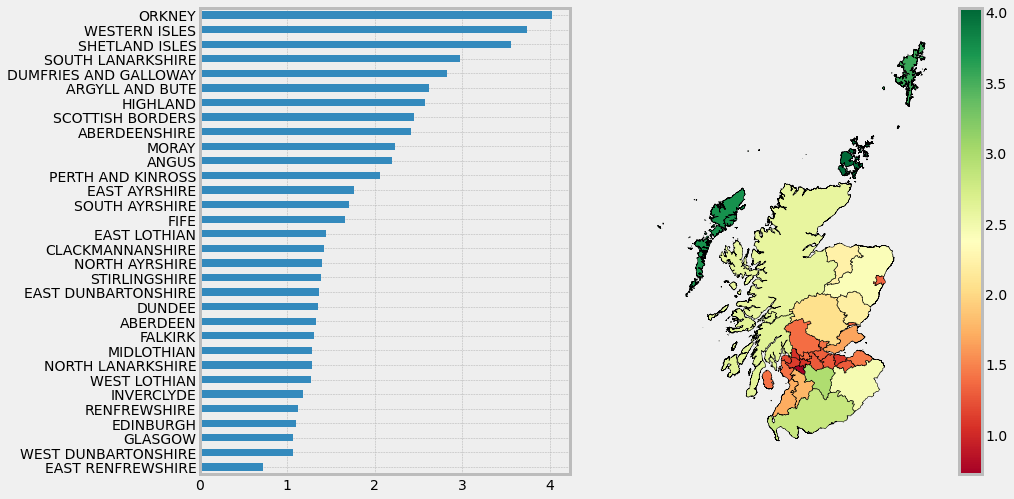

In [24]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')[feat].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = feat, k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [25]:
df2 = df.groupby(['Country','POST_TOWN'])[feat].agg([len, np.mean]).reset_index()
df2 = df2[df2['len'] >= 10].sort_values('mean', ascending = False).reset_index()
del df2['index']
df2[:10]

,Country,POST_TOWN,len,mean
0,STIRLINGSHIRE,CRIANLARICH,22,6.82
1,ARGYLL AND BUTE,TARBERT,130,6.64
2,HIGHLAND,ROGART,22,6.43
3,ARGYLL AND BUTE,COLINTRAIVE,13,5.62
4,STIRLINGSHIRE,LOCHEARNHEAD,18,5.52
5,ORKNEY,STROMNESS,178,5.51
6,HIGHLAND,STRATHCARRON,54,5.47
7,HIGHLAND,CARRBRIDGE,23,5.27
8,SCOTTISH BORDERS,GORDON,19,5.25
9,HIGHLAND,GARVE,28,5.23


### Rank Towns by potential savings in heating costs (£) over three years

In [26]:
df['Savings heating costs over 3 years (£)'] = df['Current heating costs over 3 years (£)'] - df['Potential heating costs over 3 years (£)']

In [27]:
feat = 'Savings heating costs over 3 years (£)'
df1 = df.groupby('Country')[feat].mean()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

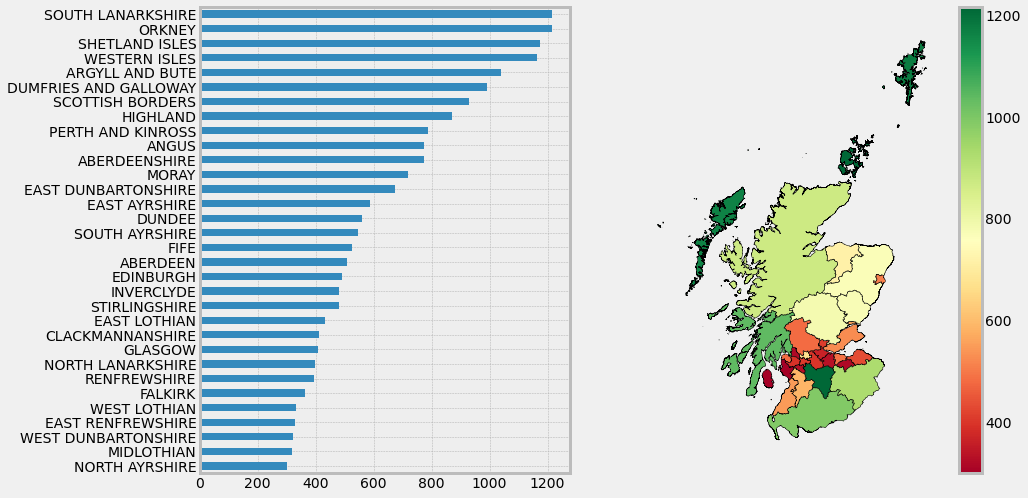

In [28]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')[feat].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = feat, k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [29]:
df2 = df.groupby(['Country','POST_TOWN'])[feat].agg([len, np.mean]).reset_index()
df2 = df2[df2['len'] >= 10].sort_values('mean', ascending = False).reset_index()
del df2['index']
df2[:10]

,Country,POST_TOWN,len,mean
0,STIRLINGSHIRE,CRIANLARICH,22,"4,005.95"
1,ARGYLL AND BUTE,TIGHNABRUAICH,64,"2,741.25"
2,HIGHLAND,CARRBRIDGE,23,"2,683.43"
3,HIGHLAND,ROGART,22,"2,614.23"
4,ARGYLL AND BUTE,DALMALLY,31,"2,440.84"
5,HIGHLAND,HELMSDALE,27,"2,391.33"
6,ARGYLL AND BUTE,TARBERT,130,"2,293.55"
7,HIGHLAND,STRATHCARRON,54,"2,290.06"
8,EAST AYRSHIRE,ISLE OF ARRAN,108,"2,273.94"
9,SCOTTISH BORDERS,GORDON,19,"2,256.95"


### Rank Towns by potential savings in hot water costs (£) over three years

In [30]:
df['Savings hot water costs over 3 years (£)'] = df['Current hot water costs over 3 years (£)'] - df['Potential hot water costs over 3 years (£)']

In [31]:
feat = 'Savings hot water costs over 3 years (£)'
df1 = df.groupby('Country')[feat].mean()
df1 = df_shape.merge(df1, on = 'Country', how = 'left')

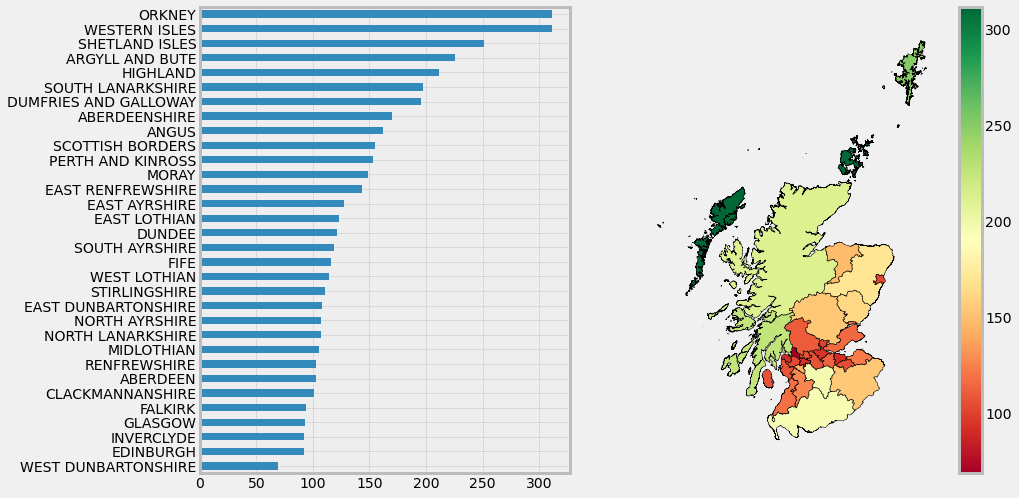

In [32]:
_, ax = plt.subplots(1,2, figsize = (13,8))
_ = df1.set_index('Country')[feat].sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '')
_ = df1.plot(ax = ax[1], edgecolor="black", column = feat, k = 5, legend = True, cmap = 'RdYlGn', )
_ = plt.axis('off')

In [33]:
df2 = df.groupby(['Country','POST_TOWN'])[feat].agg([len, np.mean]).reset_index()
df2 = df2[df2['len'] >= 10].sort_values('mean', ascending = False).reset_index()
del df2['index']
df2[:10]

,Country,POST_TOWN,len,mean
0,STIRLINGSHIRE,CRIANLARICH,22,631.77
1,ARGYLL AND BUTE,CAIRNDOW,61,466.38
2,HIGHLAND,ULLAPOOL,38,459.87
3,ARGYLL AND BUTE,COLINTRAIVE,13,432.92
4,WESTERN ISLES,ISLE OF BARRA,23,432.13
5,SCOTTISH BORDERS,COCKBURNSPATH,19,425.84
6,ARGYLL AND BUTE,TIGHNABRUAICH,64,425.39
7,ARGYLL AND BUTE,DALMALLY,31,413.32
8,ARGYLL AND BUTE,APPIN,24,403.75
9,ARGYLL AND BUTE,ISLE OF MULL,160,401.59
